# Sparks Foundation Internship

## Author: Sumit Kutty 



### Task: Prediction using Supervided ML (Predicting the scores given hours/day a student studied).

In [109]:
#import the necessary packages
from warnings import filterwarnings as w
w('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
sns.set(style='darkgrid', context='talk',      
        palette=['#62C370', '#FFD166', '#EF476F'])

In [110]:
#Loading the dataset
dataset = pd.read_csv('spark1.csv')
data = dataset.copy()
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [111]:
print(data.info())
print()
print("------------------------------------------------")
print()
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None

------------------------------------------------

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


* No null values

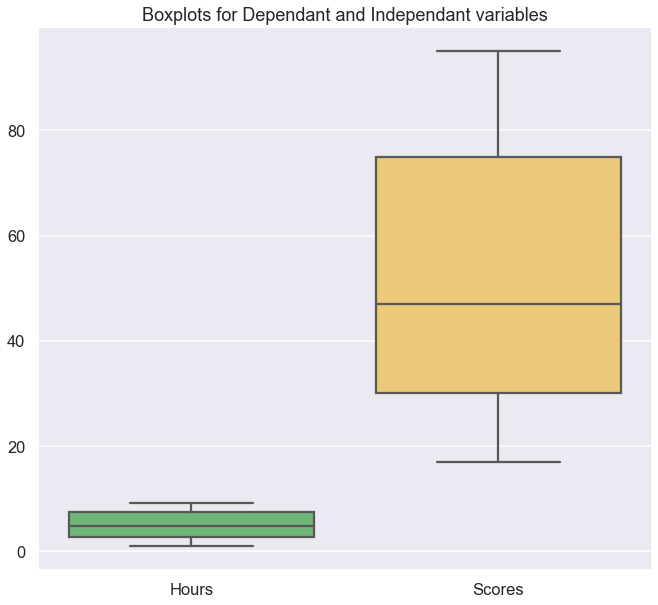

In [112]:
# Checking for Outliers
plt.figure(figsize = (11,10))
sns.boxplot(data=data.iloc[:,0:2])
plt.title('Boxplots for Dependant and Independant variables')
plt.show()

* No outliers found. There is no need to scale or explore the data further as there in only one independant variable and the data is scarce

In [113]:
# Separate the dependant and independant variables
x = np.array(data['Hours']).reshape(-1,1)
y = np.array(data['Scores']).reshape(-1,1)

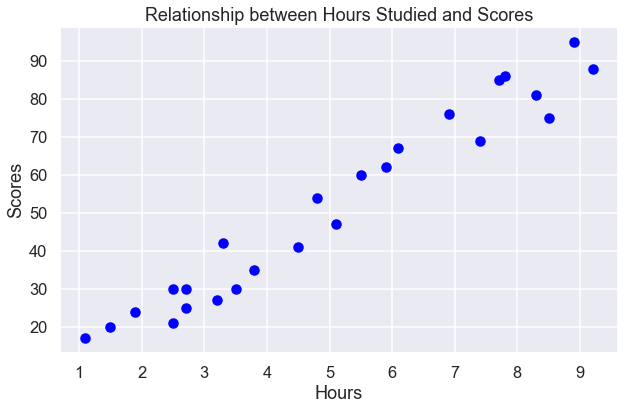

In [114]:
# plot dependant and independant variables
plt.figure(figsize = (10,6))
plt.scatter(x,y,color = 'blue')
plt.title('Relationship between Hours Studied and Scores')
plt.xlabel('Hours')
plt.ylabel("Scores")
plt.show()

* The relationship is pretty linear. This makes sense. As studying more hours/day increases, scores increase.

In [115]:
# Building a Model and calculating various performance metrics using cross validation

model = LinearRegression()
model.fit(x,y)
print("Average r2 score: ",np.mean(cross_val_score(model, x, y, cv = 5, scoring = 'r2')))
print("Average MAE score: ",np.mean(cross_val_score(model, x, y, cv = 5, scoring = 'neg_mean_absolute_error')))
print("Average MSE score: ",np.mean(cross_val_score(model, x, y, cv = 5, scoring = 'neg_mean_squared_error')))
print("Average RMSE score: ",np.mean(cross_val_score(model, x, y, cv = 5, scoring = 'neg_root_mean_squared_error')))

Average r2 score:  0.9180771341891051
Average MAE score:  -5.701180786326049
Average MSE score:  -38.4709444297968
Average RMSE score:  -5.970137529278324


In [116]:
# Looking at the slope and intercept of the line fitted to the data

print("Slope of the Line: {:.2f}".format(float(model.coef_)))
print("y-intercept of the line: {:.2f}".format(float(model.intercept_)))

Slope of the Line: 9.78
y-intercept of the line: 2.48


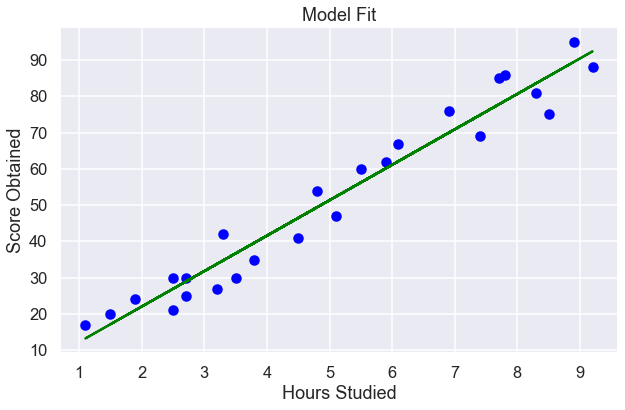

In [117]:
# Let's look at the fit of the line

line = x*model.coef_ + model.intercept_  #finding the equation of the line using the slope and intercept
plt.figure(figsize = (10,6))
plt.scatter(x,y, color = 'blue')
plt.plot(x,line, color = 'green')
plt.xlabel("Hours Studied")
plt.ylabel("Score Obtained")
plt.title("Model Fit")
plt.show()

* The line fits the data pretty well, whie not overfitting it.

In [118]:
#Predicting the Score for an input of '9.25' hours
ypred = model.predict([[9.25]])
print("The predicted score for a student studying 9.25 hours/day is {:.2f} ".format(float(ypred)))

The predicted score for a student studying 9.25 hours/day is 92.91 
